In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
data = fetch_openml(name="Superconduct", version=1, as_frame=True)
df = data.frame
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
isnull = df.isnull().sum()
isnull

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [4]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [5]:
X = df[['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
        'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']]
Y = df['critical_temp']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
elasticnet_cv = ElasticNetCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000)
elasticnet_cv.fit(X_train.fillna(X_train.median()), Y_train)
best_alpha = elasticnet_cv.alpha_
print("Best alpha:", best_alpha)

c:\python-envs\ml-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.673e+03, tolerance: 1.598e+03
  model = cd_fast.enet_coordinate_descent_gram(
c:\python-envs\ml-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.989e+03, tolerance: 1.598e+03
  model = cd_fast.enet_coordinate_descent_gram(
c:\python-envs\ml-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.081e+03, toleran

Best alpha: 0.001


c:\python-envs\ml-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+06, tolerance: 2.005e+03
  model = cd_fast.enet_coordinate_descent(


In [8]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('elasticnet', ElasticNet(alpha=best_alpha))
])

In [9]:
X_train

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
16546,2,77.143500,53.722300,71.372307,51.848347,0.619298,0.497747,58.553000,32.438300,29.276500,...,4.000000,4.000000,4.000000,4.000000,0.693147,0.325083,0,3.200000,0.000000,0.000000
5970,4,104.365600,71.922350,72.746865,43.369558,1.129463,1.221243,184.590600,26.332050,70.392496,...,2.000000,2.000000,2.000000,2.000000,1.386294,1.207974,0,0.800000,0.000000,0.000000
7542,5,74.231650,51.256952,60.515221,34.941384,1.453747,1.327852,121.327600,20.724892,39.445875,...,2.200000,2.076923,2.168944,2.063362,1.594167,1.229147,1,1.064615,0.400000,0.266469
2157,7,88.309607,48.586910,69.138309,33.542945,1.740703,1.724444,191.200600,11.938538,57.329551,...,2.571429,2.138462,2.479397,2.104979,1.908037,1.479833,2,1.030769,0.728431,0.451559
18265,5,69.321369,72.150027,56.104529,55.643005,1.434383,1.302362,124.908250,31.227062,40.715396,...,3.600000,3.575000,3.437544,3.381939,1.567056,1.488545,3,0.950000,1.019804,1.115516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,25.643269,25.348850,25.608325,25.315724,0.691785,0.678668,2.676539,4.303250,1.338269,...,2.500000,2.390000,2.449490,2.342640,0.673012,0.692928,1,0.050000,0.500000,0.487750
11964,4,144.041845,128.014563,135.218871,120.611379,1.325694,1.318069,102.177620,32.495603,49.630753,...,5.750000,5.833333,5.732657,5.820421,1.383370,1.224634,1,2.166667,0.433013,0.372678
5390,5,95.509280,56.977188,73.307186,36.853454,1.419515,1.484104,157.054600,14.484329,55.077433,...,2.200000,2.078431,2.168944,2.064624,1.594167,1.287474,1,0.996078,0.400000,0.268849
860,4,92.505350,60.961000,68.030395,36.899835,1.172035,0.995372,134.360600,36.735514,55.465617,...,2.750000,2.307143,2.632148,2.259535,1.342113,1.096043,2,1.057143,0.829156,0.505632


In [10]:
Y_train

16546     5.00
5970     97.00
7542     62.10
2157     60.00
18265     4.00
         ...  
11284     1.50
11964     5.82
5390     60.00
860      15.00
15795     0.70
Name: critical_temp, Length: 17010, dtype: float64

In [ ]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
Y_pred

In [ ]:
X_test

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
13976,2,82.768190,87.837285,82.144935,87.360109,0.685627,0.509575,20.276380,51.522285,10.138190,...,4.500000,4.750000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013
1710,4,76.444563,81.456750,59.356672,68.229617,1.199541,1.108189,121.327600,36.950657,43.823354,...,2.250000,2.142857,2.213364,2.119268,1.368922,1.309526,1,0.571429,0.433013,0.349927
369,5,88.936744,51.090431,70.358975,34.783991,1.445824,1.525092,122.906070,10.438667,46.482335,...,2.400000,2.114679,2.352158,2.095193,1.589027,1.314189,1,0.967890,0.489898,0.318634
1698,4,76.517718,56.149432,59.310096,35.562124,1.197273,1.042132,122.906070,31.920690,44.289459,...,2.250000,2.251429,2.213364,2.214646,1.368922,1.078855,1,1.074286,0.433013,0.433834
13540,3,104.608490,89.558979,101.719818,88.481210,1.070258,0.944284,59.945470,33.541423,25.225148,...,5.000000,5.811245,4.762203,5.743954,1.054920,0.803990,3,3.024096,1.414214,0.728448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,5,78.679650,47.470467,64.164718,33.787166,1.462708,1.563777,121.327600,7.936672,39.450875,...,2.200000,2.077042,2.168944,2.063461,1.594167,1.305471,1,0.921418,0.400000,0.266657
5170,6,77.094700,69.438829,57.770092,57.301298,1.519991,1.519073,188.383900,22.748657,60.942047,...,2.666667,2.285714,2.492883,2.198023,1.717076,1.724972,3,0.357143,1.105542,0.795395
14614,3,45.962167,42.353583,42.814225,39.569809,1.028046,1.085931,41.637500,5.402430,17.500246,...,3.000000,3.086667,2.884499,2.957321,1.060857,1.004485,2,1.013333,0.816497,0.863610
13134,3,96.306193,62.484138,59.302184,36.172257,0.791360,0.883332,168.937180,32.378650,68.968749,...,5.000000,4.900000,4.932424,4.810470,1.085189,0.948246,2,1.900000,0.816497,0.943398


In [ ]:
Y_test

13976     6.40
1710     91.20
369      38.00
1698     19.00
13540    11.00
         ...  
6246     83.60
5170     83.50
14614     3.50
13134     8.70
11466     2.15
Name: critical_temp, Length: 4253, dtype: float64

In [ ]:
accuracy = r2_score(Y_test,Y_pred)
print("Accuracy (R²):", accuracy)

Accuracy (R²): 0.8483815586718833


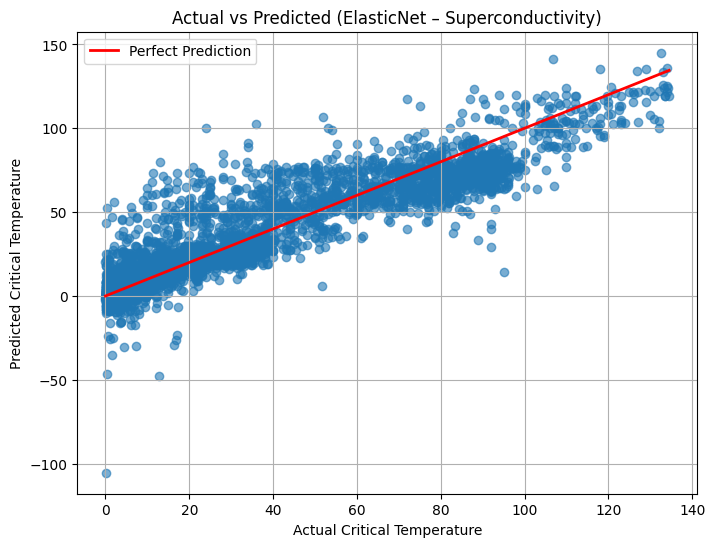

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    color='red',
    linewidth=2,
    label='Perfect Prediction'
)
plt.xlabel("Actual Critical Temperature")
plt.ylabel("Predicted Critical Temperature")
plt.title("Actual vs Predicted (ElasticNet – Superconductivity)")
plt.legend()
plt.grid(True)
plt.show()